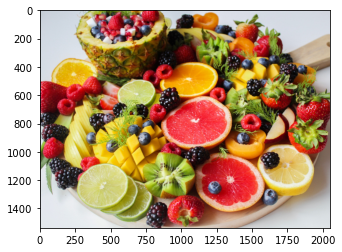

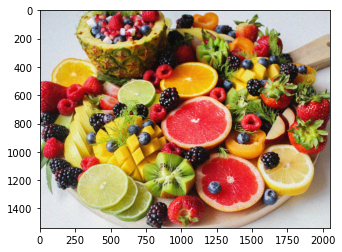

In [1]:
#adding the noise

from skimage.util import random_noise
import matplotlib.pyplot as plt
#adding noise
fruit_image=plt.imread('fruits.jpg')

#add noise to the image
noisy_image=random_noise(fruit_image)

#show the original and resulting image
plt.imshow(fruit_image)
plt.show()
plt.imshow(noisy_image)
plt.show()



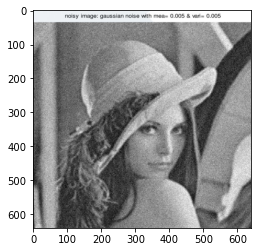

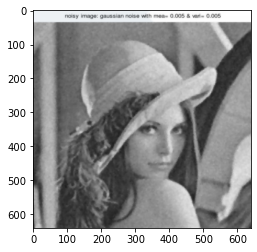

In [2]:
#reduceing noise
from skimage.restoration import denoise_tv_chambolle
noisy_image=plt.imread('noisy_image.jpg')

#apply total variation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image, multichannel=True)
#show the original and resulting image
plt.imshow(noisy_image)
plt.show()
plt.imshow(denoised_image)
plt.show()

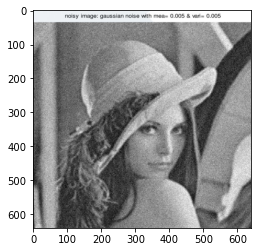

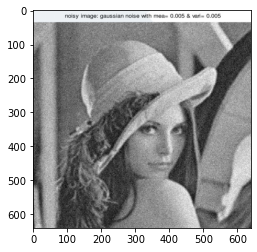

In [3]:
#reducing noise while preserving edges

from skimage.restoration import denoise_bilateral
landscape_image=plt.imread('noisy_image.jpg')

#apply bilateral filter denosng
denoised_image=denoise_bilateral(landscape_image,multichannel=True)

#show original and resulting image
plt.imshow(noisy_image)
plt.show()
plt.imshow(denoised_image)
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_13056/2063608776.py:12: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(img,n_segments=400, compactness=20)
C:\Users\User\AppData\Local\Temp/ipykernel_13056/2063608776.py:15: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,img,kind='avg')


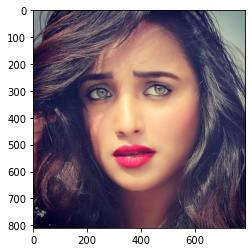

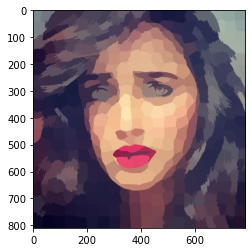

In [4]:
#segmentation
#1 superpixel segmentation

from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt

img=plt.imread('face.jpg')


#obtain the segmentation with 400 regions
segments=slic(img,n_segments=400, compactness=20)

#put segments on top of original image to compare
segmented_image=label2rgb(segments,img,kind='avg')

#show the segmented image
plt.imshow(img.astype('uint8'))
plt.show()
plt.imshow(segmented_image.astype('uint8'))
plt.show()

In [5]:
#contours

#contouring shapes

def show_image_contour(image,contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
        plt.imshow(image,interpolation='nearest',cmap='gray_r')
        plt.title('contours')
        plt.axis('off')

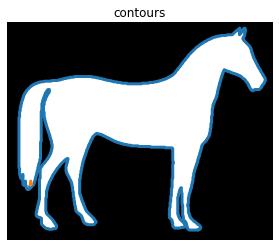

In [6]:
from skimage import measure,data

#obtain the horse image 
horse_image=data.horse()

#find the contours with a constant level value of 0.8
contours=measure.find_contours(horse_image,level=0.8)

#shows the image with contours  found
show_image_contour(horse_image,contours)

In [16]:
def show_image_contour(image,contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
        plt.imshow(image,interpolation='nearest',cmap='gray_r')
        plt.title('contours')
        plt.axis('off')

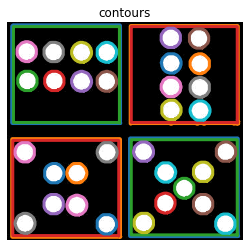

In [17]:
#find contours of an image that is not binary

from skimage.io import imread
from skimage.filters import threshold_otsu
import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import measure,data
image_dices=imread('imgd.jpg')

#role the image grayscale
image_dices=color.rgb2gray(image_dices)

#grey=cv2.cvtColor(image_dices,cv2.COLOR_BGR2GRAY)

#obtain  the optional thresh value
thresh=threshold_otsu(image_dices)

#apply thresholding
binary=image_dices > thresh

#Find contours at a constant value of 0.8
contours = measure.find_contours(binary, level=0.8)

#show the image
show_image_contour(image_dices, contours)

Dices dots number:33.


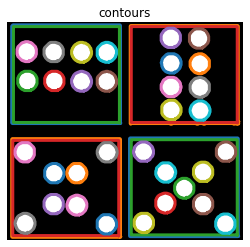

In [18]:
#count the dots in a dice's image
import numpy as np
shape_contours =[cnt.shape[0] for cnt in contours]

#set 50 as the maximun size of the dots shape
max_dots_shape =200
#count dots in contours excluding bigger than dots size
dots_contours=[cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

#shows all contours found
show_image_contour(binary, contours)

print('Dices dots number:{}.'.format(len(dots_contours)))